# Douglas Silva - Projeto Machine Learning

### O que eu descobri:

    - As matérias que melhor podem determinar quão bem um aluno(a) foi na prova do Enem (no ano de 2017) foram:
        - Matemática, 
        - Línguagens e Códigos
        - Nota sobre Selecionar e Relacionar assuntos (Redação)
        
    - A composição das notas finais(no nosso exemplo) é melhor determinada pelas notas das provas do que pelas nota da redação.
    
    - É possível prevermos com uma taxa bem razoável de acertos o desempenho de um aluno(a) dado o valor listado para as três notas acima
    (considerando nossos critérios em questão)


## Formação Machine Learning Alura - Dados do ENEM

Na formação de Machine Learning da www.alura.com.br vamos inicialmente analisar os dados do Enem 2017. O Enem é uma prova aplicada aos alunos que completam o ensino médio, usada como porta de entrada para diversas faculdades no Brasil. A prova é composta de 9 avaliações distintas: Ciências da Natureza, Ciências Humanas, Linguagens e Códigos, Matemática e 5 competências ligadas a prova de redação.

Duas situações podem ser interessantes:

a) uma faculdade deseja dar bolsa de estudos para os e as melhores estudantes. Para isso não deseja exigir que as pessoas façam todas as partes da prova.
b) seria possível prever a nota dos alunos e alunas se eles fizerem somente parte da prova? Seja deixando em branco propositalmente parte dela, ou exigindo somente uma correção parcial da prova de redação, como por exemplo somente um ou dois componentes ao invés de 5?

As duas perguntas são resumidas em: será possível prever quem teria as melhores notas em todas as partes, somente tendo feito parte da prova?

Para responder essa pergunta tentaremos modelar os dados de duas formas diferentes.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [326]:
import warnings
warnings.filterwarnings('ignore')
#warnings.simplefilter("once")

#!pip install seaborn=="0.9.0" --quiet
#!pip install scipy=="1.2.0" --quiet
#!pip install yellowbrick=="0.9.0" --quiet
#!pip install numpy=="1.16.0" --quiet

In [327]:
import pandas as pd
import seaborn as sns
import scipy
import yellowbrick
import numpy as np

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)
print("Usando yellowbrick %s" % yellowbrick.__version__)
print("Usando numpy %s" % np.__version__)

Usando pandas 1.3.4
Usando seaborn 0.9.0
Usando scipy 1.7.1
Usando yellowbrick 0.9
Usando numpy 1.19.1


In [328]:
# Vamos configurar o pandas para usar impressão de ponto flutuante com 3 casas decimais
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Pergunta: carregue os dados

- baixe os dados de 2017 em http://download.inep.gov.br/microdados/microdados_enem2017.zip
- salve o arquivo `DADOS/MICRODADOS_ENEM_2017.CSV` em um diretório chamado `input/MICRODADOS_ENEM_2017.CSV`
- leia esse arquivo com pandas na variável `enem`
- nem sempre um arquivo separado por vírgulas (csv) vem separado por vírgulas, use o argumento `sep=';'` para indicar que o arquivo usou `;` como separador
- nem sempre o arquivo vem com encoding UTF-8, use `encoding='iso-8859-1'` para indicar o encoding que foi utilizado no arquivo
- não carregue todas as colunas. Existem muitos dados que não utilizaremos em nosso estudo. Para isso utilize o parâmetro `usecols=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"]`
- imprima os 5 primeiros elementos

In [329]:
# solução

enem = pd.read_csv('input/MICRODADOS_ENEM_2017.csv',
                  sep=';',
                  encoding='iso-8859-1',
                  usecols=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", 
                           "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", 
                           "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"
                          ])


In [330]:
enem.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000


In [331]:
#olhando alguns detalhes mais
enem.dtypes

NU_NOTA_CN       float64
NU_NOTA_CH       float64
NU_NOTA_LC       float64
NU_NOTA_MT       float64
NU_NOTA_COMP1    float64
NU_NOTA_COMP2    float64
NU_NOTA_COMP3    float64
NU_NOTA_COMP4    float64
NU_NOTA_COMP5    float64
dtype: object

In [332]:
print("%d elementos e %d colunas" % (enem.shape[0], enem.shape[1]))
if(enem.shape[0] != 6731341):
    print("ERRO! No conjunto de 2017 existem 6731341 dados")
if(enem.shape[1] != 9):
    print("ERRO! Carregue somente 9 colunas relativas as notas")

6731341 elementos e 9 colunas


## Pergunta: abra o arquivo `DICIONARIO/Dicionário_Microdados_Enem_2017.xls`
- explore quais são as colunas que possuem as notas das 4 avaliações e das 5 componentes analisadas em redação
- crie uma lista chamada `todas_as_notas` com o nome dessas 9 colunas

In [333]:
# solução

dic = pd.read_excel('DICIONARIO/Dicionário_Microdados_Enem_2017.xlsx')

In [334]:
dic.head(10)

,DICIONÁRIO DE VARIÁVEIS - ENEM 2017,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NOME DA VARIÁVEL,Descrição,Variáveis Categóricas,NaN,Tamanho,Tipo
2,NaN,NaN,Categoria,Descrição,NaN,NaN
3,DADOS DO PARTICIPANTE,NaN,NaN,NaN,NaN,NaN
4,NU_INSCRICAO,Número de inscrição1,NaN,NaN,12,Numérica
5,NU_ANO,Ano do Enem,NaN,NaN,4,Numérica
6,CO_MUNICIPIO_RESIDENCIA,Código do município de residência,NaN,NaN,7,Numérica
7,NaN,1º dígito: Região,NaN,NaN,NaN,NaN
8,NaN,1º e 2º dígitos: UF,NaN,NaN,NaN,NaN
9,NaN,"3º, 4º, 5º e 6º dígitos: Município",NaN,NaN,NaN,NaN


In [335]:
todas_as_notas = list(enem.columns)

todas_as_notas

['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5']

In [336]:
#as descricoes com match na extracao anterior parecem existir na coluna 1, entao utilizarei esse campo para refinar a busca
col_desc = dic.columns[0]
dic_notas = dic[dic[col_desc].isin(todas_as_notas)]


dic_notas

,DICIONÁRIO DE VARIÁVEIS - ENEM 2017,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
249,NU_NOTA_CN,Nota da prova de Ciências da Natureza,NaN,NaN,9,Numérica
250,NU_NOTA_CH,Nota da prova de Ciências Humanas,NaN,NaN,9,Numérica
251,NU_NOTA_LC,Nota da prova de Linguagens e Códigos,NaN,NaN,9,Numérica
252,NU_NOTA_MT,Nota da prova de Matemática,NaN,NaN,9,Numérica
272,NU_NOTA_COMP1,Nota da competência 1 - Demonstrar domínio da ...,NaN,NaN,9,Numérica
273,NU_NOTA_COMP2,Nota da competência 2 - Compreender a proposta...,NaN,NaN,9,Numérica
274,NU_NOTA_COMP3,"Nota da competência 3 - Selecionar, relacionar...",NaN,NaN,9,Numérica
275,NU_NOTA_COMP4,Nota da competência 4 - Demonstrar conheciment...,NaN,NaN,9,Numérica
276,NU_NOTA_COMP5,Nota da competência 5 - Elaborar proposta de i...,NaN,NaN,9,Numérica


In [337]:
avaliacoes = list(dic_notas[~dic_notas[col_desc].str.contains('COMP')][col_desc])
avaliacoes

['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']

In [338]:
redacao = list(dic_notas[dic_notas[col_desc].str.contains('COMP')][col_desc])
redacao

['NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5']

In [339]:
enem[todas_as_notas].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000


## Pergunta: alguns alunos e alunas não vieram na prova e possuem valores vazios.

- Descarte todas as linhas que possuem valores inválidos
- Sobrescreva a variável `enem`
- Imprima as 5 primeiras notas de matemática (`MT`)

In [340]:
# solução

enem = enem.dropna()

enem[['NU_NOTA_MT']].head()

,NU_NOTA_MT
0,465.500
3,591.200
4,584.600
5,578.500
6,607.500


## Pergunta: analise a nota total

- a coluna `nota_total` deve ser a soma de todas as 9 notas
- imprima as 5 primeiras notas totais
- desenhe o histograma da nota total
- descreva a `nota_total` em termos de média, mediana e desvio padrão

In [343]:
# solução e impressão


#soma

#utilizei a variavel todas_as_notas para evitar incluir o nota_total na soma
enem['nota_total'] = enem[todas_as_notas].sum(axis=1)

In [349]:
#imprimindo 5 linhas
enem.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,nota_total
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000,2681.400
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000,2949.500
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000,2786.700
5,558.800,594.900,522.800,578.500,120.000,120.000,120.000,120.000,60.000,2795.000
6,625.900,636.800,588.300,607.500,100.000,100.000,80.000,80.000,40.000,2858.500


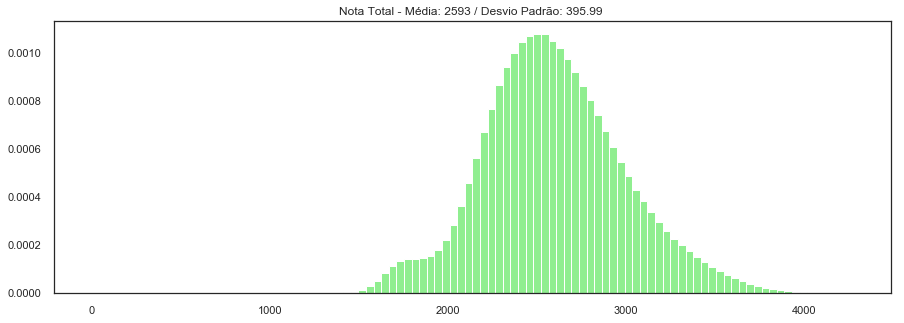

count   4426755.000
mean       2592.747
std         395.990
min           0.000
25%        2330.700
50%        2569.300
75%        2839.500
max        4276.200
Name: nota_total, dtype: float64


In [350]:
# solução histograma e descrição

import matplotlib.pyplot as plt


nota_total = enem['nota_total']
media, desvpad = round(np.mean(nota_total)), round(np.std(nota_total),2)

plt.figure(figsize=(15,5))
plt.hist(nota_total, bins=100, density=True, alpha=1, color='lightgreen')
plt.title(f'Nota Total - Média: {media} / Desvio Padrão: {desvpad} ')

plt.show()


#descrevendo nota_total
desc_total = enem['nota_total'].describe()

print(desc_total)

## Pergunta: extraia 1% dos dados para explorarmos

- utilize o seed de aleatoriedade 745
- use a função `sample` para extrair 1% dos dados em uma variável chamada `enem_eda`
- plote o histograma de `enem_eda`
- descreva a `nota_total` desse sample de 1%
- a média, mediana e desvio padrão de nosso sample parecem representar o conjunto total?

Enem EDA sampling tem a distribuição
count   44268.000
mean     2593.210
std       397.953
min       827.400
25%      2328.500
50%      2570.400
75%      2839.900
max      4060.000
Name: nota_total, dtype: float64


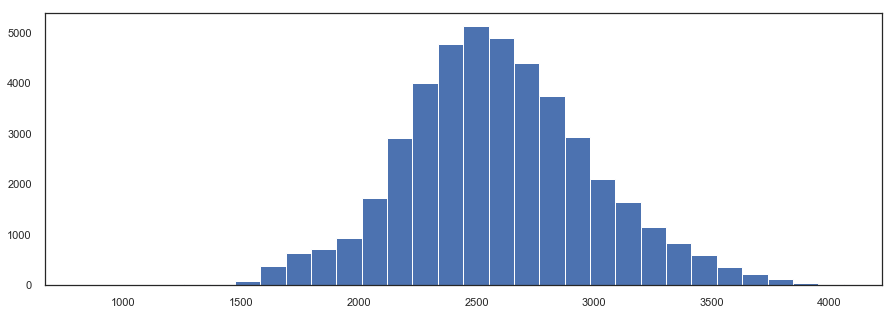

In [351]:
import matplotlib.pyplot as plt
import random
# solução sua função de sampling

def eda_sample(enem):
    # seed
    SEED = random.seed(745)
    # 1% de sample em enem_eda
    enem_eda = enem.sample(frac=0.01)
    print("Enem EDA sampling tem a distribuição")
    # descreva a nota_total
    print(enem_eda['nota_total'].describe())
    # plote o histograma da nota_total e mostre com plt.show()
    plt.figure(figsize=(15,5))
    plt.hist(enem_eda['nota_total'], bins=30)
    plt.show()
    return enem_eda

enem_eda = eda_sample(enem)

As duas amostras se parecem bem, no sentido de que os dados se distribuem 
de forma bem semelhante e ambas não contém valores anormais(outliers).

A amostra em questão parece descrever bem os dados da população.

A média, mediana e desvio padrão representam bem os valores do conjunto total.

## Pergunta: analise a correlação entre as notas

- inclua a `nota_total` a `todas_as_notas`
- analise a correlação entre as variáveis contidas em todas as notas (uma tabela 10x10)

In [352]:
#solucao

correlacoes = enem.corr()

todas_as_notas = list(enem.columns)
todas_as_notas

['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'nota_total']

In [353]:
if(correlacoes.shape != (10,10)):
    print("A matriz de correlação deveria ser entre 10 notas, totalizando 10 linhas por 10 colunas")

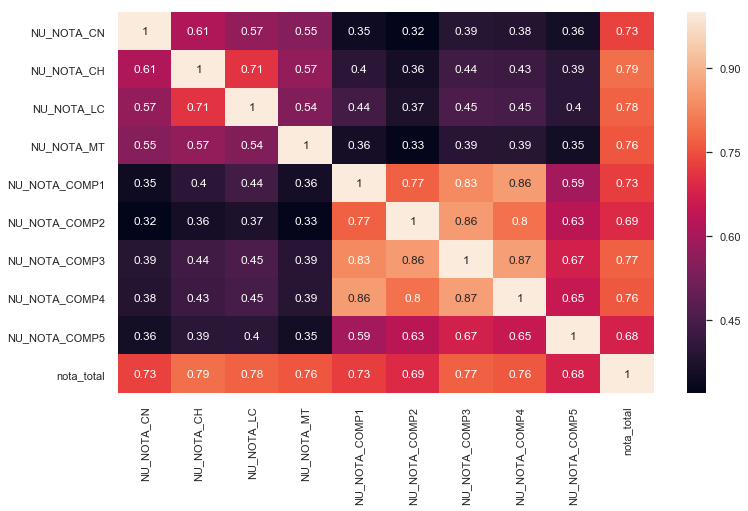

In [354]:
import seaborn as sns

size_ = (12, 7)

fig, ax = plt.subplots(figsize=size_)
sns.heatmap(ax=ax, data=enem.corr(), annot=True)

## Pergunta: analise a correlação da nota_total

- extraia somente a linha relativa a `nota_total`
- atribua essa tabela 1x10 a variável `correlacao_com_nota_total`
- plote um gráfico de barras horizontais com o valor da correlação de cada nota com `nota_total`
- o gráfico deve estar ordenado da correlação mais baixa no topo para a correlação mais alta no fim
- use o estilo branco de gráficos do seaborn: `sns.set(style="white")`

In [355]:
# solução: cálculo da tabela de correlação com todas as notas

#extraindo a variavel
correlacao_com_nota_total = pd.DataFrame(correlacoes.loc['nota_total'])

In [356]:
print(correlacao_com_nota_total)

               nota_total
NU_NOTA_CN          0.733
NU_NOTA_CH          0.794
NU_NOTA_LC          0.776
NU_NOTA_MT          0.760
NU_NOTA_COMP1       0.726
NU_NOTA_COMP2       0.693
NU_NOTA_COMP3       0.773
NU_NOTA_COMP4       0.761
NU_NOTA_COMP5       0.677
nota_total          1.000


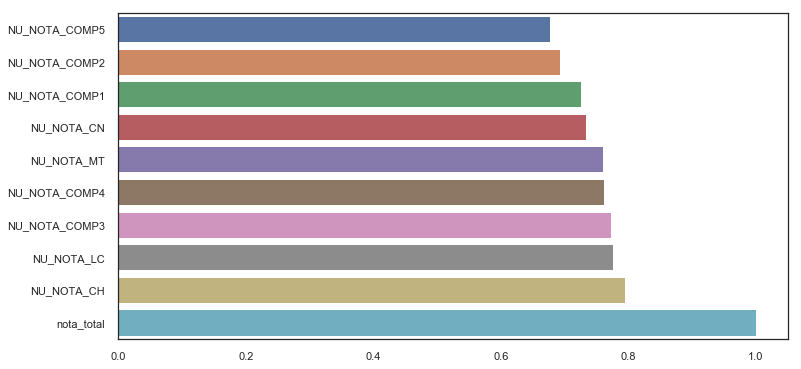

In [357]:
# solução gráfico

def plota_correlacao(dados):
    sns.set(style="white")
    plt.figure(figsize=(12, 6))
    corr = dados.corr()['nota_total'].sort_values()
    sns.barplot(y=corr.index, x=corr.values)

plota_correlacao(enem)

## Pergunta: tente um primeiro modelo

- Alguns estudiosos indicam que matemática e línguas formam a base para a educação
- Com base nesse conhecimento prévio, utilize de `enem_eda` as colunas `NU_NOTA_MT` e `NU_NOTA_LC` e `nota_total`
- Crie uma variável chamada `interesse` com esses dados
- Crie uma função chamada `split` que recebe esses dados
    - Ela usa o seed para números aleatórios do numpy 42367
    - Ela faz um `train_test_split` com porcentagem de treino e teste padrão.
    - Ela imprime o tamanho dos conjuntos resultantes de treino e teste
    

In [358]:
# solução: definindo interesse e imprimindo os 5 primeiros elementos

interesse = enem_eda[['NU_NOTA_MT', 'NU_NOTA_LC', 'nota_total']]

interesse.head()

,NU_NOTA_MT,NU_NOTA_LC,nota_total
4398094,504.400,528.400,2716.200
3670663,359.300,415.100,2159.800
1337565,594.200,590.500,3189.000
2760888,361.700,546.200,2464.800
5101734,478.200,555.500,2668.700


In [359]:
# Solução: a função de split

from sklearn.model_selection import train_test_split

def split(dados):
    # seed
    np.random.seed(42367)
    # train_test_split
    target = dados['nota_total']
    features = dados.drop(target.name, axis=1)
    
    
    
    train_x, test_x, train_y, test_y = train_test_split(features, target)
    print("*" * 80)
    print("Quebrando em treino (x,y) e teste (x,y)", train_x.shape, train_y.shape,test_x.shape, test_y.shape)
    print("Usando colunas %s como X" % str(train_x.columns.values))
    print("Desvio padrão do conjunto de testes", test_y.std())
    return train_x, test_x, train_y, test_y

In [360]:
train_x, test_x, train_y, test_y = split(interesse)
if(train_x.shape[1]!=2):
    print("*" * 80)
    print("Erro! Você deveria possuir somente duas colunas em X")
    print("*" * 80)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 2) (33201,) (11067, 2) (11067,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_LC'] como X
Desvio padrão do conjunto de testes 395.50784453764334


## Pergunta: execute uma regressão linear

- defina a função `roda_regressao_linear` que recebe os 4 conjuntos de dados de treino e teste (x e y)
- treine um modelo `LinearRegression` do sklearn 
- calcule o R^2 score no conjunto de teste
- calcule o mean squared error (`mse`) e o mean absolute error (`mae`) do conjunto de teste
- imprima essas 3 métricas

In [361]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [362]:
# Solução: função para executar a regressão linear

#funcao auxiliar
def r2_score_my(actual, predicted):

    e1 = np.array(predicted)-np.array(actual)

    e1_2 = e1**2

    e2 = np.array(actual) - np.mean(actual)

    e2_2 = e2**2

    r2_score = 1 - (sum(e1_2) / sum(e2_2))

    return r2_score

def roda_regressao_linear(train_x, test_x, train_y, test_y):
    
    # crie o modelo, treine com os dados de treino
    model = LinearRegression()
    
    model.fit(train_x, train_y)
    # calcule o r2_score com os dados de teste
    predictions = model.predict(test_x)
    
    mae = mean_absolute_error(predictions, test_y)
    mse = mean_squared_error(predictions, test_y)
    media = np.mean(test_y)
    r2_score = r2_score_my(predictions, test_y)
    
    # calcule a predição e os dois tipos de erros
    
    test_pred = model.predict(test_x)
    print("*" * 80)
    print("r2 score", r2_score)
    print("mse", mse)
    print("mae", mae)
    
    return model

In [363]:
# código pronto

roda_regressao_linear(train_x, test_x, train_y, test_y)

********************************************************************************
r2 score 0.6966979673851216
mse 36718.776963421944
mae 142.73067688138374


LinearRegression()

## Pergunta: analise o erro médio absoluto

- compare o erro médio absoluto com o desvio padrão dos estudantes do conjunto de testes
- o que você achou do erro encontrado com o uso desse modelo linear?

## Solução

O desempenho do modelo não é bom. Na verdade também não é ruim, mas não é um modelo utilizável, uma vez que podemos refinar bem mais o seu desempenho.

Talvez devessemos reconsiderar a dica dos especialistas e revisar nossas notas a considerar.

## Analisando o erro

Utilizando o módulo `yellowbrick` podemos rapidamente plotar os erros encontrados para cada estudante. No eixo X estará a `nota_total` real, enquanto no eixo Y a `nota_total` prevista pelo modelo. Quanto mais próxima da diagonal de identidade (x=y), mais correta a previsão do modelo.

Quanto menor o mean absolute error menor, mais próximo da diagonal será o modelo linear.

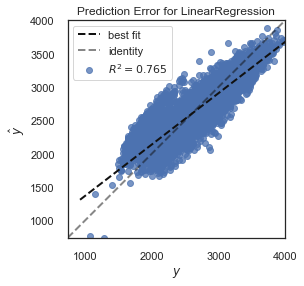

In [364]:
# código pronto

from yellowbrick.regressor import PredictionError

def visualiza_erros(train_x,train_y,test_x,test_y):
    visualizer = PredictionError(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()

visualiza_erros(train_x,train_y,test_x,test_y)

## Analisando o erro

Outra maneira importante de analisar o erro é ver a distribuição do resíduo, "o quão errado" nosso modelo está para os diversos valores previstos. No eixo X temos o valor previsto pelo modelo, enquanto no eixo Y o erro dessa previsão (os resíduos).

Um modelo razoável que captura a relação entre as variáveis de X e a variável dependente y comete erros de maneira "normal", isto é, seus resíduos devem seguir uma distribuição normal, mostrando não haver uma tendência para erros maiores ou menores em determinadas situações.

No gráfico a seguir você verá que a distribuição dos resíduos (gráfico da direita) se assemelham ao de uma normal.

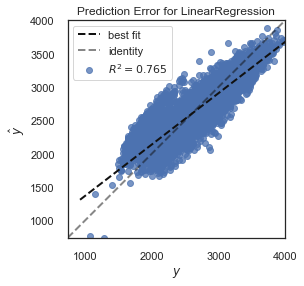

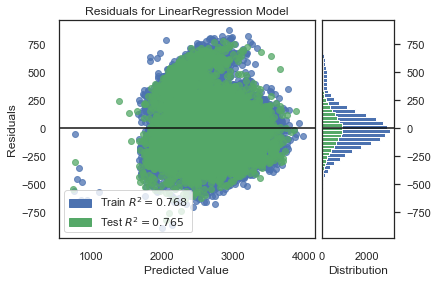

In [365]:
# código pronto

from yellowbrick.regressor import ResidualsPlot

def visualiza_erros(train_x,train_y,test_x,test_y):
    visualizer = PredictionError(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()
    
    visualizer = ResidualsPlot(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()

visualiza_erros(train_x,train_y,test_x,test_y)

## Explorando combinações de features

Ainda nessa fase de exploração escolhemos um conjunto de features (matemática e línguas) para tentar prever a nota final. Mas sabemos da correlação das variáveis de nota com a nota total que algumas possuem uma correlação maior do que outras.

De maneira análoga ao código anterior execute o modelo linear para diversas combinações de notas que julgar pertinente.

Para cada conjunto de notas que julgar pertinente:
- escolha as colunas e crie a variável `interesse` com elas
- invoque o `split` do `interesse`
- aplique a `run_linear_regression`
- aplique a `visualiza_erros`

Dentre os modelos a testar, verifique alguns importantes:
- com todas as 9 notas, o modelo é capaz de errar pouco? afinal a nota total é uma combinação linear de todas as 9 notas
    - R: O modelo está usando a mesma base que concebeu o valor da nota_final, o que não parece muito certo (seria um target leakage nesse caso, certo?)
- com 8 notas, qual o erro mínimo?
    - R: MAE 26.09 MSE 1095
- com 1, 2 ou 3 notas que você julgar que faz sentido, quais erros encontra?

    - R:
    As notas de redação, mesmo que agrupadas entre si, não conseguem definir o resultado, o que(apesar de ser intuitivo), nos leva a entender que o desempenho nas matérias é muito mais relevante que o desempenho da Redação.

In [366]:
# código pronto

def regressao_completa_para(notas):
    interesse = enem_eda[notas]
    train_x, test_x, train_y, test_y = split(interesse)
    model = roda_regressao_linear(train_x, test_x, train_y, test_y)
    visualiza_erros(train_x,train_y,test_x,test_y)

In [367]:
correlacao_com_nota_total.sort_values(by='nota_total', ascending=False)

,nota_total
nota_total,1.000
NU_NOTA_CH,0.794
NU_NOTA_LC,0.776
NU_NOTA_COMP3,0.773
NU_NOTA_COMP4,0.761
NU_NOTA_MT,0.760
NU_NOTA_CN,0.733
NU_NOTA_COMP1,0.726
NU_NOTA_COMP2,0.693
NU_NOTA_COMP5,0.677


********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 9) (33201,) (11067, 9) (11067,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP1'
 'NU_NOTA_COMP2' 'NU_NOTA_COMP3' 'NU_NOTA_COMP4' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 395.50784453764334
********************************************************************************
r2 score 1.0
mse 7.524002562812915e-25
mae 6.81771758011043e-13


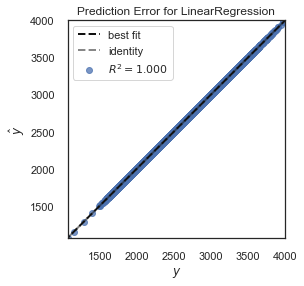

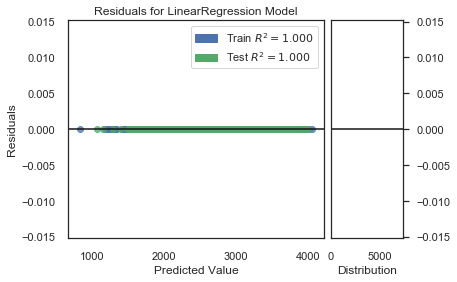

In [368]:
# solução 1: teste com todas as notas
# crie várias células com as combinações que julgar necessárias invocando sempre `regressao_completa_para`
# invoque ela com as notas que deseja analisar *E* a nota_total
regressao_completa_para(todas_as_notas)


In [369]:
#notas prova
notas_prova = [nota for nota in todas_as_notas if nota.find('COMP') == -1]
notas_prova

#notas redacao
notas_redacao = todas_as_notas[4:]

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 5) (33201,) (11067, 5) (11067,)
Usando colunas ['NU_NOTA_COMP1' 'NU_NOTA_COMP2' 'NU_NOTA_COMP3' 'NU_NOTA_COMP4'
 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 395.50784453764334
********************************************************************************
r2 score 0.5037183747238768
mse 51718.040311619596
mae 182.68111612526928


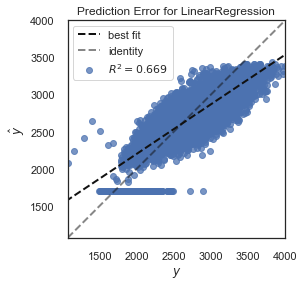

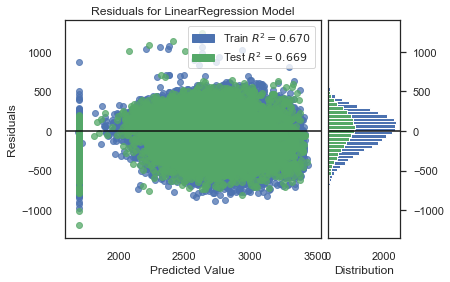

In [370]:
# solução 2: teste outra combinação
#notas redacao

regressao_completa_para(notas_redacao)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 4) (33201,) (11067, 4) (11067,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT'] como X
Desvio padrão do conjunto de testes 395.50784453764334
********************************************************************************
r2 score 0.8212267647857364
mse 23795.258779856544
mae 108.59447367361324


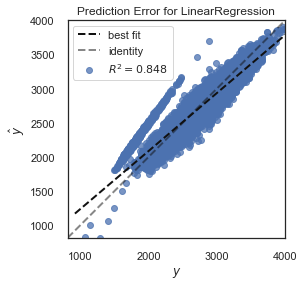

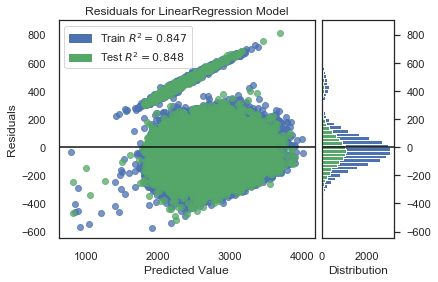

In [371]:
# solução 3: teste outra combinação

regressao_completa_para(notas_prova)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_COMP3'] como X
Desvio padrão do conjunto de testes 395.50784453764334
********************************************************************************
r2 score 0.8819037862969434
mse 16549.341896100857
mae 102.24539224680483


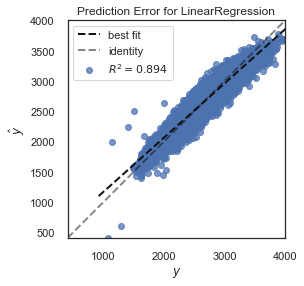

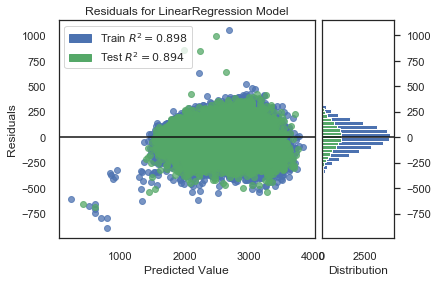

In [372]:
# solução 4: teste outra combinação
#notas mais correlacionadas com a final
top3_notas_mais_correlacionadas = list(correlacao_com_nota_total.sort_values(
    by='nota_total', 
    ascending=False
)[0:4].index)


regressao_completa_para(top3_notas_mais_correlacionadas)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 6) (33201,) (11067, 6) (11067,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_MT' 'NU_NOTA_COMP1' 'NU_NOTA_COMP2' 'NU_NOTA_COMP4'
 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 395.50784453764334
********************************************************************************
r2 score 0.9395506485644074
mse 8953.131847437322
mae 74.573052905128


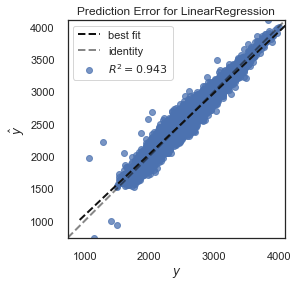

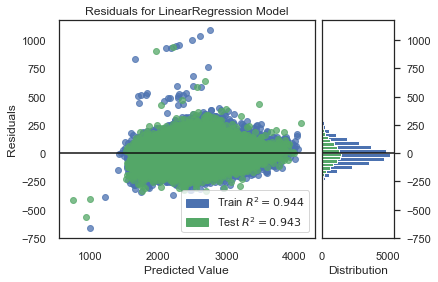

In [373]:
# solução 5: teste outra combinação
#notas menos correlacionadas com a final

top3_notas_menos_correlacionadas = [nota for nota in todas_as_notas 
                                    if nota not in 
                                    top3_notas_mais_correlacionadas[1:]]

regressao_completa_para(top3_notas_menos_correlacionadas)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 8) (33201,) (11067, 8) (11067,)
Usando colunas ['NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_COMP3' 'NU_NOTA_COMP4' 'NU_NOTA_MT'
 'NU_NOTA_CN' 'NU_NOTA_COMP1' 'NU_NOTA_COMP2'] como X
Desvio padrão do conjunto de testes 395.50784453764334
********************************************************************************
r2 score 0.9926151573808727
mse 1145.0442311997629
mae 26.649795826195877


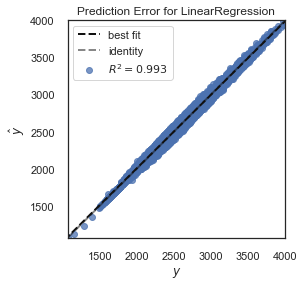

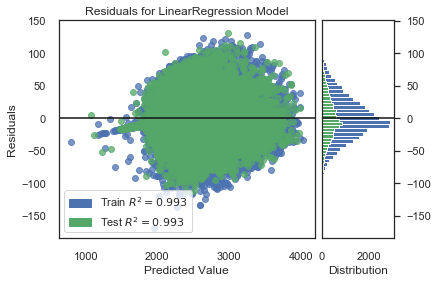

In [374]:
# solução 6: teste outra combinação
#8 variaveis

top8_variaveis = list(correlacao_com_nota_total.sort_values(
    by='nota_total', 
    ascending=False
)[0:-1].index)

regressao_completa_para(top8_variaveis)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_COMP2' 'NU_NOTA_COMP1'] como X
Desvio padrão do conjunto de testes 395.50784453764334
********************************************************************************
r2 score 0.7744877805161283
mse 28712.068354466883
mae 135.21760689096283


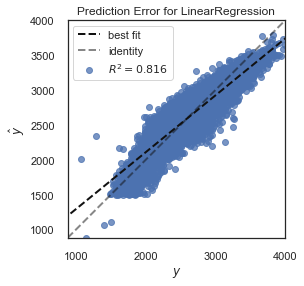

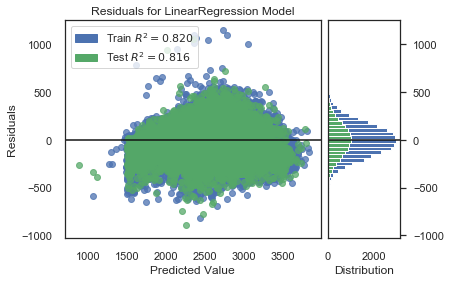

In [375]:
# solução 7: teste outra combinação
#notas com menor correlacao entre si

variaveis_menos_correlacionadas = ['NU_NOTA_CN', 'NU_NOTA_COMP2', 
                                   'NU_NOTA_COMP1', 'nota_total']


regressao_completa_para(variaveis_menos_correlacionadas)

## Pergunta: tente um modelo específico

- A prova de língua não envolve a criação de textos complexos, mas aborda a língua portuguesa
- A prova de matemática junto coma de língua apresenta um modelo razoável
- A prova de redação apresenta a oportunidade de criar textos complexos

Juntando essas três informações tente o mesmo processo de 4 passos para o modelo linear com `NU_NOTA_LC`, `NU_NOTA_COMP3` e `NU_NOTA_MT`. Analise o erro médio absoluto, o R^2 e a distribuição dos erros comparados aos modelos anteriores.

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_COMP3' 'NU_NOTA_MT'] como X
Desvio padrão do conjunto de testes 395.50784453764334
********************************************************************************
r2 score 0.9181054672882742
mse 11871.046110304014
mae 87.01549614154655


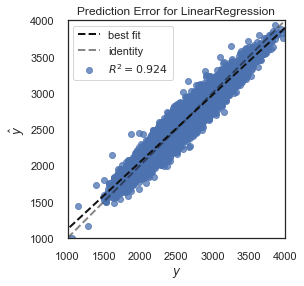

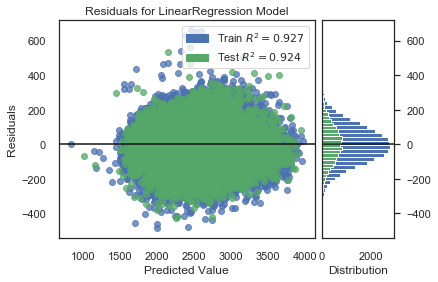

In [376]:
# solução

regressao_completa_para(['NU_NOTA_LC', 'NU_NOTA_COMP3', 'NU_NOTA_MT', 'nota_total'])

## Escolhemos as features, qual o estimador ideal?

Vamos explorar mais ainda nosso conjunto de exploração. Vamos continuar com o conjunto de 3 notas, que seria uma possível conquista: somente com um componente de redação e 2 notas de provas seríamos capazes de prever razoavelmente a avaliação final de um aluno ou aluna.

Apesar dos gráficos anteriores indicarem que o modelo linear tem sido razoável para nossos dados, vamos testar outros estimadores. 

## Pergunta: Prepare diversos estimadores

- Implemente a função `gera_regressores` que retorna uma lista de estimadores
- Do sklearn coloque na lista:
    - `LinearRegression`
    - `Lasso`
    - `Ridge`
    - `DecisionTreeRegressor`
    - `RandomForestRegressor`

In [377]:
# solução

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

def gera_regressores():
    # gere os modelos em uma lista
    modelos = [LinearRegression(),
              Lasso(),
              Ridge(),
              #DecisionTreeRegressor(),
               MLPRegressor(),
              RandomForestRegressor()]
    
    return modelos

In [378]:
# teste

if(len(gera_regressores()) != 5):
    print("Erro!!! São 5 regressores que queremos testar!")

# Pergunta: crie uma função que escolhe parte dos dados

- implemente a função `escolhe_colunas`
- ela recebe o conjunto de dados e as colunas a filtrar
- escolha somente as colunas dos dados
- chame o `split` para esses dados filtrados, separando em treino e teste, x e y
- imprima o histograma de `train_y`
- plote o gráfico com `plt.show()`
- retorne `train_x, test_x, train_y, test_y` nessa ordem

In [379]:
# solução

def escolhe_dados(dados, colunas):
    #assert 'nota_final' in dados.columns
    #colunas.append('nota_final')
    
    # extraia as colunas
    dados_filtrados = dados[colunas]
    
    train_x, test_x, train_y, test_y = split(dados_filtrados)
    # faça o split
    # plote o histograma de train_y
    plt.show()
    
    return train_x, test_x, train_y, test_y

## Pergunta: treine e gere as métricas

- crie uma função para treinar e gerar as métricas de uma regressão

In [380]:
# solução:

import time
def treina_e_mede_regressor(modelo, train_x, test_x, train_y, test_y):
    tic = time.time()
    # treine seu modelo
    modelo.fit(train_x, train_y)
    tac = time.time()
    tempo_de_treino = tac - tic

    # calcule a previsão para test_x
    predictions = modelo.predict(test_x)
    # calcule o mse
    mse = mean_squared_error(test_y, predictions)
    # calcule o mae
    mae = mean_absolute_error(test_y, predictions)
    print("Resultado", modelo, mse, mae)

    return mse, mae, tempo_de_treino

In [381]:
# código pronto

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

def analisa_regressao(dados):
    train_x, test_x, train_y, test_y = escolhe_dados(dados, ["NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3", "nota_total"])
    
    resultados = []
    for modelo in gera_regressores():
        # crie um pipeline chamado pipe usando StandardScaler() e o modelo
        scaler = StandardScaler()
        # use o make_pipeline ou crie um Pipeline
        pipe = make_pipeline(StandardScaler(), modelo)
        print(pipe)
        mse, mae, tempo_de_treino = treina_e_mede_regressor(pipe, train_x, test_x, train_y, test_y)
        
        resultados.append([modelo, pipe, tempo_de_treino, mse, mae])
        
    resultados = pd.DataFrame(resultados, columns=["modelo", "pipe", "tempo_de_treino", "mse", "mae"])
    return test_x, test_y, resultados

In [382]:
test_x, test_y, notas = analisa_regressao(enem_eda)
notas[["modelo", "mse", "mae", "tempo_de_treino"]]

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Desvio padrão do conjunto de testes 395.50784453764334
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
Resultado Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())]) 11871.046110304016 87.01549614154655
Pipeline(steps=[('standardscaler', StandardScaler()), ('lasso', Lasso())])
Resultado Pipeline(steps=[('standardscaler', StandardScaler()), ('lasso', Lasso())]) 11871.187343038364 87.05999326442927
Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())])
Resultado Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())]) 11871.038485954703 87.01568964884969
Pipeline(steps=[('standardscaler', StandardScaler()

,modelo,mse,mae,tempo_de_treino
0,LinearRegression(),11871.046,87.015,0.008
1,Lasso(),11871.187,87.060,0.013
2,Ridge(),11871.038,87.016,0.009
3,MLPRegressor(),11179.191,83.715,25.909
4,"(DecisionTreeRegressor(max_features='auto', ra...",13406.968,91.458,4.993


## Resultado parcial

Somente nos nossos dados de exploração fomos capazes de perceber que um modelo de regressão linear parece ser capaz de explicar a variável `nota_total` em função de três variáveis. Por mais que a rede neural possa ter se saído um pouco melhor na métrica de `mean absolute error`, o treino é longo mesmo para 5% dos dados, que ainda estamos explorando.

Como uma regressão linear simples não possui hiper-parâmetros, nosso estudo de regressão vai parar por aqui. Possuímos indícios de que podemos usar um modelo de regressão em cima de 3 notas. Mas e no caso de identificarmos alunos e alunas para bolsa? Nesse caso não precisamos saber a nota final específica, mas sim se ela está no topo das pessoas que fizeram a prova. Isto é, o aluno ou aluna está ou não está no topo X% dos alunos?

Ao invés de usarmos uma regressão, tentaremos usar uma classificação! É comum reduzir um problema de regressão em classificação através do "encaixotamento" (binning) dos valores. Por exemplo, se o topo 25% dos alunos possuem nota maior que 2600, então quem tem menos fica com 0 e quem tem mais fica com 1. Poderíamos fazer também uma classificação entre os menores 25% (0), o bolo do meio (1) e o topo 25% (2). Como nosso cliente deseja entender o topo dos alunos e alunas vamos para a abordagem de 0 e 1.

In [383]:
#5%? o enem_eda foi composto por 1% dos dados, fiz errado? D:

## Pergunta: As notas de treino

- dado os últimos dados de teste gerados, gere um histograma da variável y (`nota_total` que é o `test_y`)

percentil 75%: 2839.8999999999996


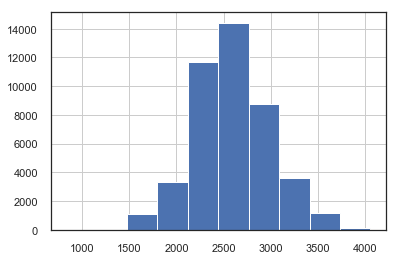

In [385]:
# solução: histograma

enem_eda['nota_total'].hist()

#o caminho abaixo seria válido para pegarmos esse limiar de 75%?
#a logica aqui foi a de que se conseguirmos mapear o percentil 75%, podemos usar esse valor como corte
print(f"percentil 75%: {np.percentile(enem_eda['nota_total'], 75)}")

## Pergunta: criando as classes

- Crie uma função chamada `top_p` que recebe uma série de dados e um p que indica o quantil, por padrão 0.75
- A função devolve uma nova série
- O resultado são 0s para  quem está abaixo do quantil, e 1s para quem está acima

In [386]:
#a mesma solução que fiz acima
# solução

def top_p(serie, p=0.75):
    # calcule o quantil p
    quant = np.percentile(serie, p * 100)
    # defina y como sendo uma serie de 1s e 0s. 1 se o valor da serie for maior que o quantil, 0 se menor
    """
    Pessoal, no ponto abaixo, caso a função entregue o .values, ou um array, o proximo teste quebra
    caso não, preciso declarar o .values no teste da função lá embaixo...então alterei essa pra entregar 
    a condição do teste e alterei o teste abaixo para não aplicar o .values
    """
    y = pd.Series([1 if nota > quant else 0 for nota in serie]).values
    return y

In [387]:
# teste do top 25%
top_25 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p = 0.75) #tinha um .values aqui anteriormente
if(not np.array_equal(top_25, [0,0,0,0,0,0,0,1,1,1])):
    print("Não retornou o top 25% corretamente, deveria ser ", top_25)

In [388]:
# teste do top 10%

top_10 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p = 0.90) #aqui também
if(not np.array_equal(top_10, [0,0,0,0,0,0,0,0,0,1])):
    print("Não retornou o top 10% corretamente, deveria ser", top_10)

## Visualizando classes e features

O `yellowbrick` permite visualizar o balanço de suas classes. O código a seguir vai conferir e permitir visualizar que separamos 25% dos alunos e alunas:

In [389]:
# código pronto

y_top25 = top_p(test_y)
y_top25.mean()

0.2500225896810337

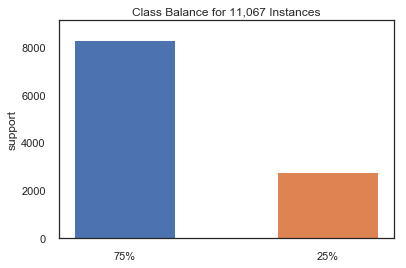

In [390]:
# código pronto

from yellowbrick.target import ClassBalance

visualizer = ClassBalance(labels=["75%", "25%"])
visualizer.fit(y_top25)
visualizer.poof()

## Para saber mais: agrupando

O `yellowbrick` possui uma função para visualizar possíveis binnings. O código a seguir mostra 4 sugestões de pontos para agrupamento. Não usaremos a sugestão do yellowbrick pois no nosso caso o cliente já definiu que queria os X% do topo.

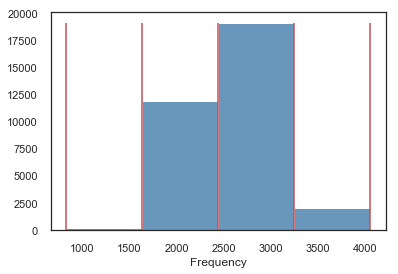

In [391]:
# código pronto

from yellowbrick.target import BalancedBinningReference

visualizer = BalancedBinningReference()
visualizer.fit(train_y)
visualizer.poof()

## O modelo completo para classificação

Vamos passar agora pelo mesmo processo de classificação.

## Pergunta: Prepare diversos estimadores

- Implemente a função `gera_classificadores` que retorna uma lista de estimadores
- Do sklearn coloque na lista:
    - `DummyClassifier` com a estratégia `most_frequent` (mais frequente) que será nosso baseline
    - `LogisticRegression`
    - `RidgeClassifier`
    - `DecisionTreeClassifier`
    - `RandomForestClassifier(n_estimators=10)`
    - `SVC`

In [392]:
# código pronto
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [393]:
# solução

def gera_classificadores():
    # defina seus modelos
    modelos = [DummyClassifier(),
              LogisticRegression(),
              RidgeClassifier(),
              DecisionTreeClassifier(),
              RandomForestClassifier(),
              SVC()]
    return modelos

In [394]:
# código pronto

if(len(gera_classificadores()) != 6):
    print("Erro!!! São 6 classificadores que queremos testar!")

## Pergunta: defina uma nova função de split, agora baseada nas classes

- crie a função `split_classe` que recebe os `dados`
- use `42367` como seed para o `numpy`
- X são todas as colunas exceto a coluna `top_p`
- y é a coluna `top_p`
- chame `train_test_split`
    - stratify é a coluna y
- imprima os tamanhos dos conjuntos
- imprima o número de colunas de X
- imprima a média de test_y
- retorne os conjuntos de treino e teste

In [395]:
def split_classificacao(dados):
    assert 'top_p' in dados.columns
    # faça o seed do numpy
    np.random.seed(42367)
    # defina X como todas as colunas de `dados` exceto top_p
    X = dados.drop('top_p', axis=1)
    # defina y como somente a coluna top_p
    y = dados['top_p']
    # quebre em treino e teste, usando estratificação baseada em y
    train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y)
    #print("*" * 80)
    #print("Quebrando em treino (x,y) e teste (x,y)", train_x.shape, train_y.shape,test_x.shape, test_y.shape)
    #print("Usando colunas %s como X" % str(train_x.columns.values))
    #print("Média do conjunto de testes", test_y.mean())
    return train_x, test_x, train_y, test_y

## Testando sua função de split

In [397]:
# código pronto: teste

interesse = enem_eda[["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]
interesse['top_p'] = top_p(interesse['nota_total'])
interesse = interesse[["top_p", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]

train_x, test_x, train_y, test_y = split_classificacao(interesse)

if(train_x.shape[1] != 3):
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if(test_y.mean() <= 0.24 or test_y.mean() >= 0.26):
    print("*" * 80)
    print("Erro! Você deveria capturar somente o top 25% e usar estratificação no split")
    print("*" * 80)
    

## Pergunta: implemente o treino e o teste do classificador

In [398]:
# solução:

import time
from sklearn.metrics import accuracy_score as acc_score

def treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y):
    tic = time.time()
    # treine o pipeline
    pipe.fit(train_x, train_y)
    tac = time.time()
    tempo_de_treino = tac - tic
    # calcule a accuracy_score
    preds = pipe.predict(test_x)
    
    accuracy_score = acc_score(preds, test_y)
    
    #print("Resultado", nome, accuracy_score)

    return accuracy_score, tempo_de_treino

## Pergunta implemente a função de escolha de dados e split para classificação

In [399]:
# solução:

def escolhe_dados_para_classificacao(dados, colunas, p, visual=False):
    interesse = dados[colunas]# selecione somente as colunas especificas de dados
    nota_total = dados['nota_total']# somente a coluna nota_total
    interesse['top_p'] = top_p(nota_total, p)# defina quem está no top p

    colunas.remove("nota_total")
    interesse = interesse[[*colunas, "top_p"]]
    
    train_x, test_x, train_y, test_y = split_classificacao(interesse)
    if visual == True:
        train_y.hist()
        plt.show()
    return train_x, test_x, train_y, test_y

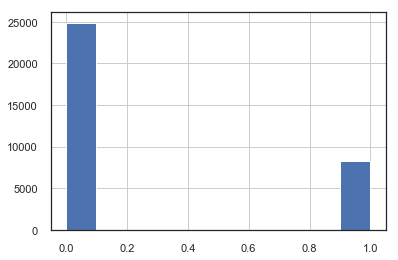

In [400]:
# testando a escolha

train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(enem_eda, ["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"], 
                                                                    p=0.75,visual=True)

if(train_x.shape[1] != 3):
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if(test_y.mean() <= 0.24 or test_y.mean() >= 0.26):
    print("*" * 80)
    print("Erro! Você deveria capturar somente o top 25% e usar estratificação no split")
    print("*" * 80)
    

In [401]:
# código pronto

def analisa_classificacao(dados, p = 0.75):
    
    colunas = ["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]
    train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(dados, colunas, p=p)
    
    resultados = []
    for modelo in gera_classificadores():
        nome = type(modelo).__name__
        pipe = make_pipeline(StandardScaler(), modelo)
        accuracy_score, tempo_de_treino = treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y)
        resultados.append([nome, modelo, pipe, tempo_de_treino, accuracy_score])
        
    resultados = pd.DataFrame(resultados, columns=["tipo", "modelo", "pipe", "tempo_de_treino", "accuracy_score"])
    #return test_x, test_y, resultados.set_index("tipo")
    return resultados.set_index('tipo')


## Pergunta: rode a analisa_classificacao

- rode 6 vezes, cada uma em uma célular diferente, vamos ver o quão bem os modelos tentam prever o top X%
- queremos o top 25% (quantil/p=0.75), top 20%, top 10%, top 5% e top 1%
- queremos também rodar para as últimas 25% pessoas, isto é p=0.25

In [402]:
# solução top 25%

# rode a analisa_classificacao e armazene test_x, test_y e notas
notas_classificacao = analisa_classificacao(enem_eda, p=0.75)

notas_classificacao

,modelo,pipe,tempo_de_treino,accuracy_score
tipo,,,,
DummyClassifier,DummyClassifier(),"(StandardScaler(), DummyClassifier())",0.004,0.622
LogisticRegression,LogisticRegression(),"(StandardScaler(), LogisticRegression())",0.043,0.932
RidgeClassifier,RidgeClassifier(),"(StandardScaler(), RidgeClassifier())",0.012,0.923
DecisionTreeClassifier,DecisionTreeClassifier(),"(StandardScaler(), DecisionTreeClassifier())",0.052,0.907
RandomForestClassifier,"(DecisionTreeClassifier(max_features='auto', r...","(StandardScaler(), (DecisionTreeClassifier(max...",1.642,0.924
SVC,SVC(),"(StandardScaler(), SVC())",3.400,0.931


In [403]:
# solução top 20%

# rode a analisa_classificacao e armazene test_x, test_y e notas
#notas[["accuracy_score", "tempo_de_treino"]]

analisa_classificacao(enem_eda, p=0.8)

,modelo,pipe,tempo_de_treino,accuracy_score
tipo,,,,
DummyClassifier,DummyClassifier(),"(StandardScaler(), DummyClassifier())",0.004,0.680
LogisticRegression,LogisticRegression(),"(StandardScaler(), LogisticRegression())",0.030,0.947
RidgeClassifier,RidgeClassifier(),"(StandardScaler(), RidgeClassifier())",0.010,0.929
DecisionTreeClassifier,DecisionTreeClassifier(),"(StandardScaler(), DecisionTreeClassifier())",0.049,0.923
RandomForestClassifier,"(DecisionTreeClassifier(max_features='auto', r...","(StandardScaler(), (DecisionTreeClassifier(max...",1.614,0.942
SVC,SVC(),"(StandardScaler(), SVC())",3.020,0.948


In [404]:
# solução top 10%

# rode a analisa_classificacao e armazene test_x, test_y e notas
analisa_classificacao(enem_eda, p=0.9)

,modelo,pipe,tempo_de_treino,accuracy_score
tipo,,,,
DummyClassifier,DummyClassifier(),"(StandardScaler(), DummyClassifier())",0.004,0.822
LogisticRegression,LogisticRegression(),"(StandardScaler(), LogisticRegression())",0.030,0.971
RidgeClassifier,RidgeClassifier(),"(StandardScaler(), RidgeClassifier())",0.008,0.931
DecisionTreeClassifier,DecisionTreeClassifier(),"(StandardScaler(), DecisionTreeClassifier())",0.046,0.956
RandomForestClassifier,"(DecisionTreeClassifier(max_features='auto', r...","(StandardScaler(), (DecisionTreeClassifier(max...",1.345,0.965
SVC,SVC(),"(StandardScaler(), SVC())",1.428,0.971


In [405]:
# solução top 5%

# rode a analisa_classificacao e armazene test_x, test_y e notas
analisa_classificacao(enem_eda, p=0.95)

,modelo,pipe,tempo_de_treino,accuracy_score
tipo,,,,
DummyClassifier,DummyClassifier(),"(StandardScaler(), DummyClassifier())",0.004,0.908
LogisticRegression,LogisticRegression(),"(StandardScaler(), LogisticRegression())",0.052,0.983
RidgeClassifier,RidgeClassifier(),"(StandardScaler(), RidgeClassifier())",0.008,0.950
DecisionTreeClassifier,DecisionTreeClassifier(),"(StandardScaler(), DecisionTreeClassifier())",0.031,0.976
RandomForestClassifier,"(DecisionTreeClassifier(max_features='auto', r...","(StandardScaler(), (DecisionTreeClassifier(max...",1.187,0.980
SVC,SVC(),"(StandardScaler(), SVC())",0.814,0.984


In [406]:
# solução top 1%

# solução top 10%

# rode a analisa_classificacao e armazene test_x, test_y e notas
analisa_classificacao(enem_eda, p=0.99)

,modelo,pipe,tempo_de_treino,accuracy_score
tipo,,,,
DummyClassifier,DummyClassifier(),"(StandardScaler(), DummyClassifier())",0.005,0.980
LogisticRegression,LogisticRegression(),"(StandardScaler(), LogisticRegression())",0.038,0.996
RidgeClassifier,RidgeClassifier(),"(StandardScaler(), RidgeClassifier())",0.009,0.990
DecisionTreeClassifier,DecisionTreeClassifier(),"(StandardScaler(), DecisionTreeClassifier())",0.032,0.993
RandomForestClassifier,"(DecisionTreeClassifier(max_features='auto', r...","(StandardScaler(), (DecisionTreeClassifier(max...",0.946,0.995
SVC,SVC(),"(StandardScaler(), SVC())",0.246,0.996


In [407]:
# solução bottom 25%

# rode a analisa_classificacao e armazene test_x, test_y e notas
analisa_classificacao(enem_eda, p=0.25)

,modelo,pipe,tempo_de_treino,accuracy_score
tipo,,,,
DummyClassifier,DummyClassifier(),"(StandardScaler(), DummyClassifier())",0.004,0.626
LogisticRegression,LogisticRegression(),"(StandardScaler(), LogisticRegression())",0.037,0.926
RidgeClassifier,RidgeClassifier(),"(StandardScaler(), RidgeClassifier())",0.009,0.906
DecisionTreeClassifier,DecisionTreeClassifier(),"(StandardScaler(), DecisionTreeClassifier())",0.046,0.897
RandomForestClassifier,"(DecisionTreeClassifier(max_features='auto', r...","(StandardScaler(), (DecisionTreeClassifier(max...",1.564,0.916
SVC,SVC(),"(StandardScaler(), SVC())",6.701,0.926


## Escolhendo o top 25%

Dado o cenário de topo 25%, o DummyClassifier acertou 75% das vezes, errou 25%. O modelo que estamos criando conseguiria atingir no máximo esses 25% a mais de acerto (máximo de 100%). Se conferirmos que o modelo logístico acertou 93.7%, isso significa que 93.7% - 75% = 18.7%. Portanto do ganho máximo de 25% o modelo está acertando 18.7%, um total de 74.8% de ganho do potencial máximo de um modelo.

Por mais que pareça pouco, esses 18.7% representam quase 3/4 de todo o ganho potencial que um modelo pode ter.

Você pode fazer a mesma conta paa os outros ps, lembrando que essa não é uma métrica comum de se analisar. Na prática queremos entender agora como foi que o modelo errou. Ele errou os casos do bottom 75% e do top 25% igualmente? Ou errou mais em um dos dois casos?

In [408]:
# código pronto: rodando para top 25%

# rode a analisa_classificacao e armazene test_x, test_y e notas de 25%
analisa_classificacao(enem_eda, p=0.75)

,modelo,pipe,tempo_de_treino,accuracy_score
tipo,,,,
DummyClassifier,DummyClassifier(),"(StandardScaler(), DummyClassifier())",0.004,0.622
LogisticRegression,LogisticRegression(),"(StandardScaler(), LogisticRegression())",0.029,0.932
RidgeClassifier,RidgeClassifier(),"(StandardScaler(), RidgeClassifier())",0.010,0.923
DecisionTreeClassifier,DecisionTreeClassifier(),"(StandardScaler(), DecisionTreeClassifier())",0.045,0.907
RandomForestClassifier,"(DecisionTreeClassifier(max_features='auto', r...","(StandardScaler(), (DecisionTreeClassifier(max...",1.543,0.924
SVC,SVC(),"(StandardScaler(), SVC())",3.361,0.931


## Plotando a matriz de confusão

Vamos ver quantas vezes os dois principais modelos (Regressão logística e SVC) acertam e erram. Para isso plotaremos a matriz de confusão (código pronto).

In [409]:
# código pronto

import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm):
    
    classes = ['Não topo 25%','Topo 25%']

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de confusão normalizada')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f') + '%',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Classe real')
    plt.xlabel('Classe predita')
    plt.tight_layout()
    plt.show()

def print_confusion_for(test_x, test_y, model):
    pred_y = model.predict(test_x)
    print("Acurácia do modelo em teste", model.score(test_x, test_y))
    cnf_matrix = confusion_matrix(test_y, pred_y)

    plot_confusion_matrix(cnf_matrix)


Acurácia do modelo em teste 0.9321405981747538


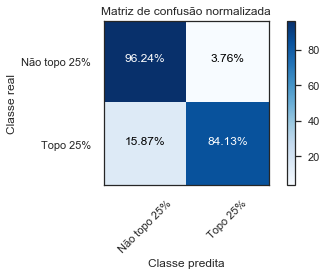

In [410]:
# código pronto

print_confusion_for(test_x, test_y, notas_classificacao.loc['LogisticRegression']['pipe'])

Acurácia do modelo em teste 0.9313273696575405


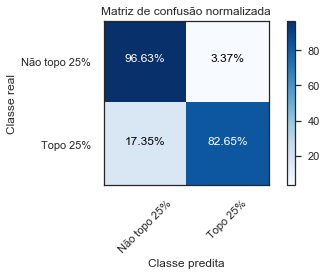

In [411]:
# código pronto

print_confusion_for(test_x, test_y, notas_classificacao.loc['SVC']['pipe'])

# Vamos validar?

Como o algoritmo de regressão logística simples obteve resultados bons, assim como o de SVC, podemos analisar a matriz de confusão para fazer a escolha. Repare que a regressão logística apresenta maior taxa de acerto no topo 25%, portanto vamos mantê-la.

Como escolhemos uma regressão logística, não possuimos um hiperparâmetro para otimizar, e vamos direto validar o modelo que treinamos. Primeiro separaremos os dados para validação.

In [420]:
# código pronto: separando os dados não usados para treino (que foram os usados em eda)

usados_no_eda = enem_eda.index
a_usar = ~enem.index.isin(usados_no_eda)
enem_validacao = enem[a_usar]
print("Para otimização temos %d elementos" % len(enem_validacao))
del(a_usar)
del(usados_no_eda)

Para otimização temos 4382487 elementos


## Pergunta: separe os dados adequadamente de validação

- implemente a função `separa_dados_de_classificacao_para_validacao`
- X são todtodas_as_notas_validacao originais da análise
- Y é o `top_p` indicando se aquele aluno ou aluna está no top 25% baseado em sua `nota_total`
- imprima a média do conjunto Y
- retorne `X, y`

In [423]:
def separa_dados_de_classificacao_para_validacao(dados):
    X = dados[["NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]# selecione as 3 colunas
    y = top_p(dados['nota_total'])# calcule o top 25% como 1 o bottom 75% como 0
    print("Média da validação", y.mean())
    return X, y

## Pergunta: defina uma função de validação cruzada de um modelo de classificação

- implemente a função `treina_e_valida_modelo_de_classificacao` que recebe os dados e o modelo
- separe os dados em X e y usando `separa_dados_de_classificacao_para_validacao`
- rode um cross_val_score com o pipe, 5 folds de validação cruzada estratificada
- imprima a acurácia encontrada na validação cruzada
- faça o treinamento do modelo
- imprima a matriz de confusão do `modelo` para `X` e `y`

Dicas:
- na validação cruzada, utilize o parâmetro `verbose=1` pois o processo pode levar alguns minutos
- na validação cruzada, utilize o parâmetro `n_jobs=-1` para usar todos os processadores possíveis de seu computador

In [454]:
# solução

from sklearn.model_selection import cross_val_score

def treina_e_valida_modelo_de_classificacao(dados, modelo):
    # calcule X e y usando a função anterior
    X, y = separa_dados_de_classificacao_para_validacao(dados)
    scores = cross_val_score(modelo, X, y) # calcule o cross_val_score
    mean = scores.mean()
    std = scores.std()
    print("Acurácia entre [%.3f,%.3f]" % (100*mean - 2*std, 100*mean + 2*std))
    modelo.fit(X, y)
    print_confusion_for(X, y, modelo)

Média da validação 0.24993571002036058
Acurácia entre [93.488,93.495]
Acurácia do modelo em teste 0.9350414502085231


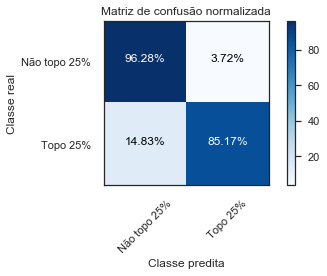

In [455]:
pipeline_logistica = make_pipeline(StandardScaler(), LogisticRegression())
treina_e_valida_modelo_de_classificacao(enem_validacao, pipeline_logistica)

## Cross validation e a matriz de confusão

Os dois resultados vão dar uma ideia do quão bom seu modelo será no mundo real.

## Lembrei de uma coisinha...

É **muito** comum no mundo real chegarmos em um resultado pior que nosso baseline. Nesses dados conseguimos um modelo razoável, mas mesmo assim também é **bem** comum, no final do processo de modelagem, lembrar de um outro tipo de modelo de base que poderíamos usar de comparação. Qual heurística simples poderia nos dizer quem vai estar nos top 25%? Repara que essa pergunta deve ser feita **antes** de se começar o projeto. Mas mesmo assim é muito comum somente próximo ao fim do projeto, agora entendendo melhor nosso conjunto de dados, chegar a ideias de heurísticas simples e poderosas que poderiam ser melhores que um modelo complexo. Infelizmente isso também pode acontecer com uma frequencia razoável. Temos que entender que faz parte: testamos heurísticas antes (como o DummyClassifier) e em qualquer momento que vierem a cabeça.

Vamos então testar uma delas?

Se soment sabemos as 3 notas de um aluno ou aluna, será que quem está no top 25% dessas 3 notas serão as pessoas que estarão no top 25% de todas as notas? Parece ser algo razoável de se imaginar como verdadeiro. Vamos então criar o **nosso estimador**! É normal "suar frio" nesse instante, será que a heurística - que parece fazer sentido - será melhor que o modelo?

## Pergunta: Implementando nosso estimador

Vamos implementar uma classe com diversas funções que todos os estimadores devem possuir. Ao treinar nosso estimador ele olha todos os alunos de treino e calcula a nota que separa o top 25%. Ao validar ele usa essa nota: se o aluno ou aluna tem uma nota maior que a nota de corte, é top 25% (1), caso contrário não é (0).

- Implemente a função `fit`. Ela recebe em X as 3 colunas que desejamos somar e deve calcular qual é o quantil de top 25%
- Implemente a função `predict`. Ela recebe X com as 3 colunas, calcula a soma delas e verifica quem está acima do quantil. Quem está acima é classificada como 1, quem está abaixo como 0
- Implemente a função `score`. Ela calcula a acurácia usando a função `accuracy_score` e as predições que o próprio estimador fez
- A função `get_params` não devolve nada uma vez que nosso estimador não possue paramêtros a serem otimizados

In [471]:
# solução: implemente o código que falta

from sklearn.metrics import accuracy_score

class HeuristicaTop25:

    def fit(self, X, y = None):
        
        X = X[["NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]
        
        if(X.shape[1] != 3):
            print("Erro!!! Estávamos esperando 3 colunas!")
            
        print(f'O número de samples em fit é de: {X.shape[0]}')
        
        parcial = X.sum(axis=1) # some **por coluna**. a função sum recebe um parâmetro para somar por coluna, não linha
        self.top_25_quantile = pd.Series(parcial).quantile(0.75)
        print("top 25 quantile é %.2f" % self.top_25_quantile)
        return self

    def predict(self, X, y = None):
        print(f'O número de samples em predict é de: {X.shape[0]}')
        parcial = X.sum(axis=1) # some por coluna
        y_pred_true_false = parcial - self.top_25_quantile # compare a soma parcial com o self.top25_quantile
        y_pred = [1 if pred >= 0 else 0 for pred in y_pred_true_false] # 1 se for maior ou igual, 0 caso contrário
        return y_pred

    def score(self, X, y = None):
        return accuracy_score(y, self.predict(X, y))

    def get_params(self, deep=True):
        return {}

Média da validação 0.24993571002036058
O número de samples em fit é de: 3505989
top 25 quantile é 1239.80
O número de samples em predict é de: 876498
O número de samples em fit é de: 3505989
top 25 quantile é 1246.50
O número de samples em predict é de: 876498
O número de samples em fit é de: 3505990
top 25 quantile é 1243.80
O número de samples em predict é de: 876497
O número de samples em fit é de: 3505990
top 25 quantile é 1253.00
O número de samples em predict é de: 876497
O número de samples em fit é de: 3505990
top 25 quantile é 1256.30
O número de samples em predict é de: 876497
Acurácia entre [91.873,91.907]
O número de samples em fit é de: 4382487
top 25 quantile é 1247.90
O número de samples em predict é de: 4382487
O número de samples em predict é de: 4382487
Acurácia do modelo em teste 0.9184593131708092


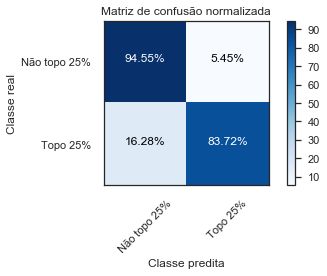

In [474]:
# fiquei um pouco confuso sobre o que tá acontecendo aqui...to com receio de ter feito algo bem errado x_x
treina_e_valida_modelo_de_classificacao(enem_validacao, HeuristicaTop25())

## Pergunta: Compare os resultados  da acurácia e da matriz de confusão entre (a) heurística final com (b) o DummyClassifier e (c) a LogisticRegression

### Solução

    A solução da heurística fica bem melhor que o baseline do DummyClassifier, porém, fica um pouco atrás de nosso modelo de RegressaoLogistica, diferença a qual, apesar de em relação aos valores não ser tão gritante, quando olhamos pro nosso número de amostras, essa diferença pode ser bem representativa.

## Pergunta: Sugira uma outra heurística que poderia ser usada para tentar detectar facilmente o top 25%, sem a necessidade de um modelo complexo

### Solução

    - Outra heurística simples...talvez definir valores minimos em cada nota possa nos ajudar a entender algo...inclusive poderia refinar a nossa performance atual, ex: nota_total está acima do valor do Q3 e nenhuma das 3 avaliações ficou abaixo de [300, ou a média das notas para aquele tópico]

## Pergunta: Se uma faculdade oferecer bolsa somente para quem o modelo julgar estar no top 25% o que acontece quando ele julga errôneamente que alguém não está no top 25%? E se julgar errôneamente que está no top 25%?

### Solução

    Isso é um problema bem tenso, pois estariamos tirando a oportunidade de bolsa de quem erronamente foi definido como não contemplado (falso negativo) e beneficiando quem não necessariamente deveriamos(falso positivo).

## Para saber mais

Essa seção serve para instigar sua curiosidade em possíveis caminhos que queira ler e se aprofundar, todos ligados ao projeto atual. Nenhum deles é obrigatório para o projeto em si.

### TRI 

Na prática a prova do Enem já usa métodos estatísticos para entender as dificuldades de suas questões e balanceá-las de diversas maneiras. A Teoria de Resposta ao Item (IRT em inglês) é uma das abordagens usadas para analisar e adaptar questões e provas. No Brasil diversas empresas e startups usam a tecnologia para entender as dificuldades e facilidades que pessoas possuem, com o objetivo de otimizar o estudo das mesmas.

### E no ano seguinte?

Devido ao TRI podemos esperar uma certa uniformidade entre provas aplicadas em anos diferentes. Mas fica a questão: estamos treinando agora nosso modelo com X% dos alunos que fizeram a prova em um ano X, portanto precisaríamos que X% dos alunos fizessem a prova completa para termos um modelo capaz de julgar somente a partir das provas parciais: não removemos a necessidade de criação da prova. Imaginando que grande parte do custo está na distribuição e correção manual da redação, existe muita margem para otimização.

Uma outra abordagem seria treinar o modelo nos dados de um ano anterior a X e ver se o modelo se comporta bem para todos os anos posteriores. Repare como a definição do processo de separação dos dados de treino (por %? por ano?) e de validação faz muita diferença em entender como podemos usar o modelo no mundo real.

### 25%?

Nossa heurística envolveu usar o top 25%, mas poderíamos testar com os top 30% das notas parciais se seriam os top 25% das notas totais. Estaríamos errando mais para um lado do que para o outro, e isso pode ser aceitável por nosso cliente. Poderíamos continuar com a modelagem, criando um hiper parâmetro em nosso modelo e tentando otimizá-lo, por exemplo, a medida que conversamos com a empresa cliente

### Redes neurais

Neste projeto não usamos redes neurais (TensorFlow, Keras, Pytorch etc) mas é outro tipo de classificador, assim como AdaBoost e outros que poderiam ser utilizados. Como o conjunto de dados é bem grande e o relacionamento entre as notas é linear (sabemos que a nota total é a soma das notas parciais, mas não sabemos a relação entre as notas que não usamos), os modelos mais simples foram capazes de pegar boa parte do padrão encontrando nos resultados finais.


### Classes balanceadas

Se usamos 75% e 25% existe um desbalanceamento das classes e isso bagunça nossas métricas e análises. O mesmo ocorreria com 3 ou mais classes distintas. Existem diversas abordagens para tentar corrigir isso. Uma delas é simplesmente remover parte dos dados da classe que está aparecendo "demais". Isto é, dos 75%, joga uma parte aleatória fora (ou usa outros métodos para criar/remover samples). O código a seguir é um exemplo de como balancear através de jogar fora dados aleatoriamente. Dado os dados já com a coluna `top_p` ele vai balancear para 50% 50% as classes:

```
from imblearn.under_sampling import RandomUnderSampler

def random_under_sampler(dados):
    X = dados.drop('top_p', axis=1)
    y = dados['top_p']
    X_under, y_under = RandomUnderSampler(random_state=0).fit_resample(X, y)
    X_under = pd.DataFrame(X_under, columns=X.columns)
    X_under['top_p'] = y_under
    return X_under
```

Teríamos que levar em consideração que o DummyClassifier passaria a acertar agora somente 50% dos casos, pois as duas classes aparecem proporcionalmente.

# Parabéns, você concluiu o projeto da Alura!

 AAAAAAAAAA, *to com medo*,

 Sinto que posso ter me perdido em algumas partes, deixado alguns detalhes passarem, mas acho que, dentro do que já me questionei,
 é o que tenho pra submeter nesse momento.

Obrigado pelo projeto, fico no aguardo da revisão(e tenso) hahaha :}}